In [2]:
%run "E:\Users\puzheng\Documents\Startup_py3.py"
sys.path.append(r"E:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

15944


# 0. required packages for h5py

In [3]:
import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

# 1. Create field-of-view class

In [4]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)

reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++',
             'save_folder':r'G:\Pu_Temp\202010_bone_marrow_igh++',
             'experiment_type': 'DNA',
             'num_threads': 6,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\Corrections_202010_2color',
             'shared_parameters':{
                     'single_im_size':[35,2048,2048],
                     'corr_channels':['750','647'],
                     'num_empty_frames': 0, 
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'min_num_seeds':200,
                     'max_num_seeds': 1200,
                     'spot_seeding_th':125,
                     'normalize_intensity_local':True,
                     'normalize_intensity_background':False,
                 },             
             }

fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=5,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          )
#fov._load_correction_profiles()

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 81
- Number of field of views: 72
- Importing csv file: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- 74 folders are found according to color-usage annotation.
+ loading fov_info from file: G:\Pu_Temp\202010_bone_marrow_igh++\Conv_zscan_05.hdf5
++ base attributes loaded:['cand_chrom_coords', 'chrom_coords', 'chrom_im', 'ref_im'] in 2.232s.
+ loading correction from file: G:\Pu_Temp\202010_bone_marrow_igh++\Conv_zscan_05.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: G:\Pu_Temp\202010_bone_marrow_igh++\Conv_zscan_05.hdf5
++ base attribu

# 2. Process image into candidate spots

In [47]:
reload(io_tools.load)
reload(spot_tools.fitting)
reload(correction_tools.chromatic)
reload(classes.batch_functions)

# process image into spots
id_list, spot_list = fov._process_image_to_spots('unique', 
                                                 #_sel_ids=np.arange(41,47),
                                                 #_sel_ids=np.arange(72,78),
                                                 _load_common_reference=True,
                                                 _load_with_multiple=False,
                                                 _save_images=True,
                                                 _warp_images=False, 
                                                 _overwrite_drift=False,
                                                 _overwrite_image=False,
                                                 _overwrite_spot=False,
                                                 _verbose=True)

-- No folder selected, allow processing all 74 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H0R0\Conv_zscan_05.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H0R0\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H0R0\Conv_zscan_05.dax  in 12.274s
-- removing hot pixels for channels:['488'] in 6.089s
-- illumination correction for channels: 488, in 1.101s
-- -- generate translation function with drift:[0. 0. 0.] in 0.001s
-- finish correction in 19.730s
-- saving fov_info to file: G:\Pu_Temp\202010_bone_marrow_igh++\Conv_zscan_05.hdf5
++ base attributes saved:['ref_im'] in 3.150s.
-- checking unique, region:[326 324] in 0.004s.
-- checking unique, region:[329 327] in 0.003s.
-- checking unique, region:[332 330] in 0.004s.
-- checki

# 3. Find chromosomes

## 3.1 load chromosome image

In [48]:
chrom_im = fov._load_chromosome_image(_type='forward', _overwrite=False)

-- choose chrom images from folder: \.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H0R0\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
-- loading chromatic correction profile from file:
	 750 chromatic_correction_750_647_35_2048_2048.npy
	 647 None
-- loading image from file:\\10.245.74.158\Chromatin_NAS_6\20201012-mouse_proB_IgH++\H0R0\Conv_zscan_05.dax  in 12.428s
-- removing hot pixels for channels:['750'] in 6.063s
-- illumination correction for channels: 750, in 1.193s
-- warp image with chromatic correction for channels: ['750'] and drift:[0. 0. 0.] 750, in 49.478s
-- finish correction in 101.432s
-- chromosome image has drift: [0. 0. 0.]
-- saving fov_info to file: G:\Pu_Temp\202010_bone_marrow_igh++\Conv_zscan_05.hdf5
++ base attributes saved:['chrom_im'] in 3.249s.


## 3.2 find candidate chromosomes

In [49]:
chrom_coords = fov._find_candidate_chromosomes_by_segmentation(_binary_per_th=99.7, 
                                                               _overwrite=False)

+ loading fov_info from file: G:\Pu_Temp\202010_bone_marrow_igh++\Conv_zscan_05.hdf5
++ base attributes loaded:[] in 1.063s.
-- adjust seed image with filter size=3
-- binarize image with threshold: 99.7%
-- erosion and dialation with size=1.
-- find close objects.
-- random walk segmentation, beta=10.
-- find objects larger than size=100
-- 738 objects are found by segmentation.
- Start multiprocessing caluclate chromosome coordinates with 6 threads in 562.568s.
-- saving fov_info to file: G:\Pu_Temp\202010_bone_marrow_igh++\Conv_zscan_05.hdf5
++ base attributes saved:['cand_chrom_coords'] in 0.090s.


## 3.3 select among candidate chromosomes

In [50]:
fov._load_from_file('unique')

chrom_coords = fov._select_chromosome_by_candidate_spots(_good_chr_loss_th=0.3,
                                                         _save=True, 
                                                         _overwrite=False)

+ loading unique from file: G:\Pu_Temp\202010_bone_marrow_igh++\Conv_zscan_05.hdf5
++ finish loading unique in 0.054s. 
+ loading fov_info from file: G:\Pu_Temp\202010_bone_marrow_igh++\Conv_zscan_05.hdf5
++ base attributes loaded:[] in 1.584s.
- start select from 738 chromosomes with loss threshold=0.3
-- remove chr id 462, percentage of lost rounds:0.688.
-- remove chr id 418, percentage of lost rounds:0.569.
-- remove chr id 452, percentage of lost rounds:0.521.
-- remove chr id 555, percentage of lost rounds:0.507.
-- remove chr id 596, percentage of lost rounds:0.451.
-- remove chr id 104, percentage of lost rounds:0.431.
-- remove chr id 230, percentage of lost rounds:0.431.
-- remove chr id 442, percentage of lost rounds:0.410.
-- remove chr id 675, percentage of lost rounds:0.410.
-- remove chr id 451, percentage of lost rounds:0.396.
-- remove chr id 584, percentage of lost rounds:0.368.
-- remove chr id 622, percentage of lost rounds:0.340.
-- remove chr id 548, percentage of

### visualize chromosomes selections

<IPython.core.display.Javascript object>


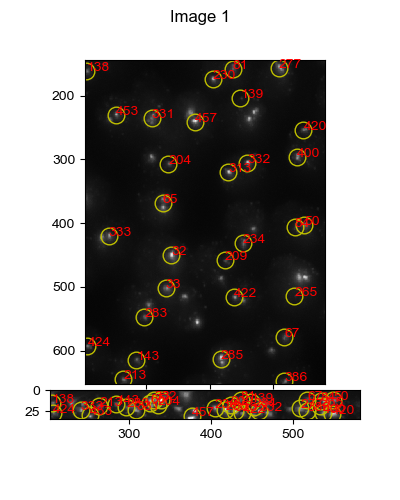

In [56]:
%matplotlib notebook
%matplotlib notebook
## visualize
coord_dict = {'coords':[np.flipud(_coord) for _coord in fov.chrom_coords],
              'class_ids':list(np.zeros(len(fov.chrom_coords),dtype=np.int)),
             }

visual_tools.imshow_mark_3d_v2([fov.chrom_im], 
                               given_dic=coord_dict,
                               save_file=None,
                               )


## select spots based on chromosomes

In [6]:
fov.chrom_coords.shape

(725, 3)

In [7]:
fov._load_from_file('unique')

+ loading unique from file: G:\Pu_Temp\202010_bone_marrow_igh++\Conv_zscan_05.hdf5
++ finish loading unique in 0.031s. 


In [8]:
intensity_th = 0.25
from ImageAnalysis3.spot_tools.picking import assign_spots_to_chromosomes

kept_spots_list = []
for _spots in fov.unique_spots_list:
    kept_spots_list.append(_spots[_spots[:,0] > intensity_th])
# finalize candidate spots
cand_chr_spots_list = [[] for _ct in fov.chrom_coords]
for _spots in kept_spots_list:
    _cands_list = assign_spots_to_chromosomes(_spots, fov.chrom_coords)
    for _i, _cands in enumerate(_cands_list):
        cand_chr_spots_list[_i].append(_cands)
print(f"kept chromosomes: {len(fov.chrom_coords)}")

kept chromosomes: 725


In [9]:
reload(spot_tools.picking)
from ImageAnalysis3.spot_tools.picking import convert_spots_to_hzxys

dna_cand_hzxys_list = [convert_spots_to_hzxys(_spots, fov.shared_parameters['distance_zxy'])
                       for _spots in cand_chr_spots_list]
dna_reg_ids = fov.unique_ids

In [10]:
# select_hzxys close to the chromosome center
dist_th = 3000 # upper limit is 5000nm
sel_dna_cand_hzxys_list = []
for _cand_hzxys, _chrom_coord in zip(dna_cand_hzxys_list, fov.chrom_coords):
    _sel_cands_list = []
    
    for _cands in _cand_hzxys:
        if len(_cands) == 0:
            _sel_cands_list.append([])
        else:
            _dists = np.linalg.norm(_cands[:,1:4] - _chrom_coord*np.array([200,108,108]), axis=1)
            _sel_cands_list.append(_cands[_dists < dist_th])
            
    # append
    sel_dna_cand_hzxys_list.append(_sel_cands_list)

### EM pick spots

- iter:0
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 7.325s
-- collapse all regions into 1d.


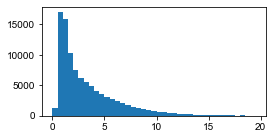

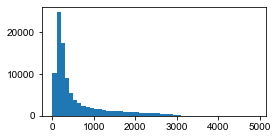

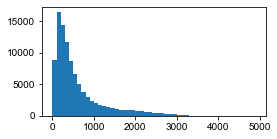

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 8.312s
-- region kept: 0.8184
- iter:1
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 7.277s
-- collapse all regions into 1d.


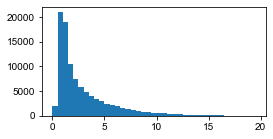

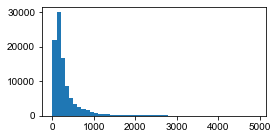

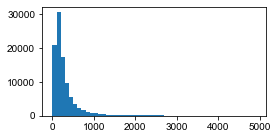

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 8.366s
-- region kept: 0.9677
- iter:2
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 7.227s
-- collapse all regions into 1d.


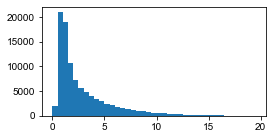

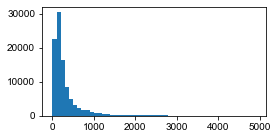

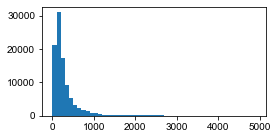

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 8.153s
-- region kept: 0.9821
- iter:3
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 7.339s
-- collapse all regions into 1d.


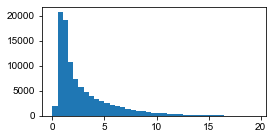

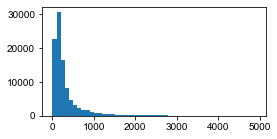

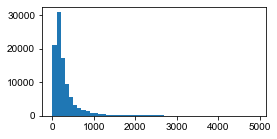

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 8.295s
-- region kept: 0.9897
- iter:4
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 7.184s
-- collapse all regions into 1d.


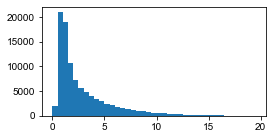

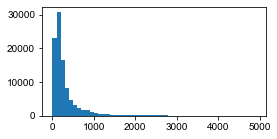

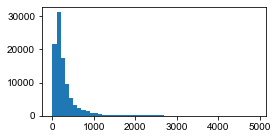

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 8.143s
-- region kept: 0.9921
- iter:5
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 7.188s
-- collapse all regions into 1d.


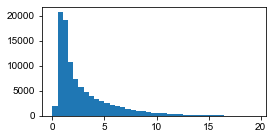

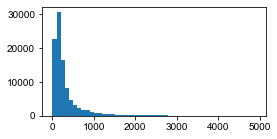

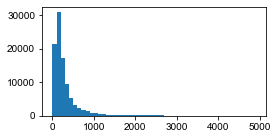

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 8.223s
-- region kept: 0.9930
- iter:6
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 7.222s
-- collapse all regions into 1d.


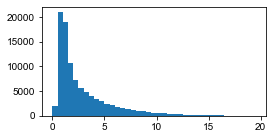

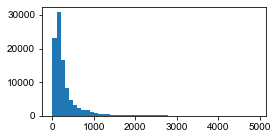

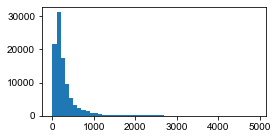

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 8.207s
-- region kept: 0.9930
- iter:7
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 7.326s
-- collapse all regions into 1d.


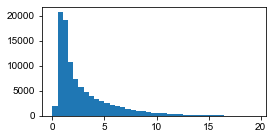

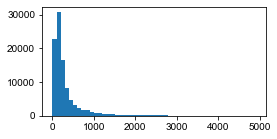

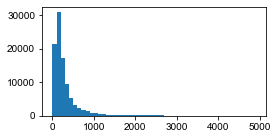

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 8.614s
-- region kept: 0.9932
- iter:8
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 8.161s
-- collapse all regions into 1d.


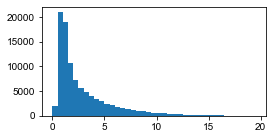

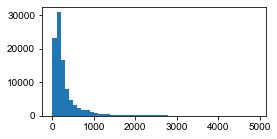

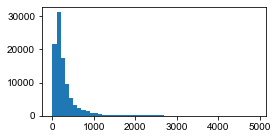

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 9.000s
-- region kept: 0.9932
- iter:9
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 7.201s
-- collapse all regions into 1d.


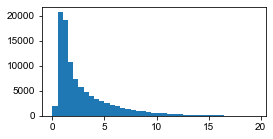

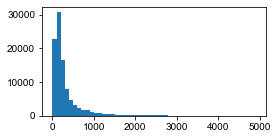

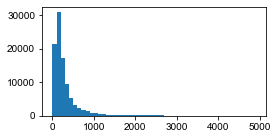

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 8.759s
-- region kept: 0.9933


In [11]:
reload(ia.spot_tools.picking)
# load functions
from ImageAnalysis3.spot_tools.picking import Pick_spots_by_intensity, EM_pick_scores_in_population, generate_reference_from_population,evaluate_differences

%matplotlib inline
niter= 10
nkeep = len(sel_dna_cand_hzxys_list)
num_threads = 12
# initialize
init_dna_hzxys = Pick_spots_by_intensity(sel_dna_cand_hzxys_list[:nkeep])
# set save list
sel_dna_hzxys_list, sel_dna_scores_list, all_dna_scores_list = [init_dna_hzxys], [], []
for _iter in range(niter):
    print(f"- iter:{_iter}")
    # generate reference
    ref_ct_dists, ref_local_dists, ref_ints = generate_reference_from_population(
        sel_dna_hzxys_list[-1], dna_reg_ids, 
        sel_dna_hzxys_list[-1][:nkeep], dna_reg_ids,
        num_threads=num_threads,
        collapse_regions=True,
    )
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_ints), bins=np.arange(0,20,0.5))
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_ct_dists), bins=np.arange(0,5000,100))
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_local_dists), bins=np.arange(0,5000,100))
    plt.show()
    # scoring
    sel_hzxys, sel_scores, all_scores = EM_pick_scores_in_population(
            sel_dna_cand_hzxys_list[:nkeep], dna_reg_ids, sel_dna_hzxys_list[-1], 
            ref_ct_dists, ref_local_dists, ref_ints,
            sel_dna_hzxys_list[-1], dna_reg_ids, num_threads=num_threads,
        )
    update_rate = evaluate_differences(sel_hzxys, sel_dna_hzxys_list[-1])
    print(f"-- region kept: {update_rate:.4f}")
    sel_dna_hzxys_list.append(sel_hzxys)
    sel_dna_scores_list.append(sel_scores)
    all_dna_scores_list.append(all_scores)
    
    if update_rate > 0.9985:
        break

In [12]:
sel_iter = -1

final_dna_hzxys_list = []
score_th = np.exp(-6)
bad_spot_percentage = 0.5
for _hzxys, _scores in zip(sel_dna_hzxys_list[sel_iter], sel_dna_scores_list[sel_iter]):
    _kept_hzxys = np.array(_hzxys).copy()
    _kept_hzxys[_scores < score_th] = np.nan
    final_dna_hzxys_list.append(_kept_hzxys)
    
from scipy.spatial.distance import pdist, squareform
distmap_list = np.array([squareform(pdist(_hzxys[:,1:4])) for _hzxys in final_dna_hzxys_list if np.mean(np.isnan(_hzxys).sum(1)>0)<bad_spot_percentage])

median_distmap = np.nanmedian(distmap_list, axis=0)

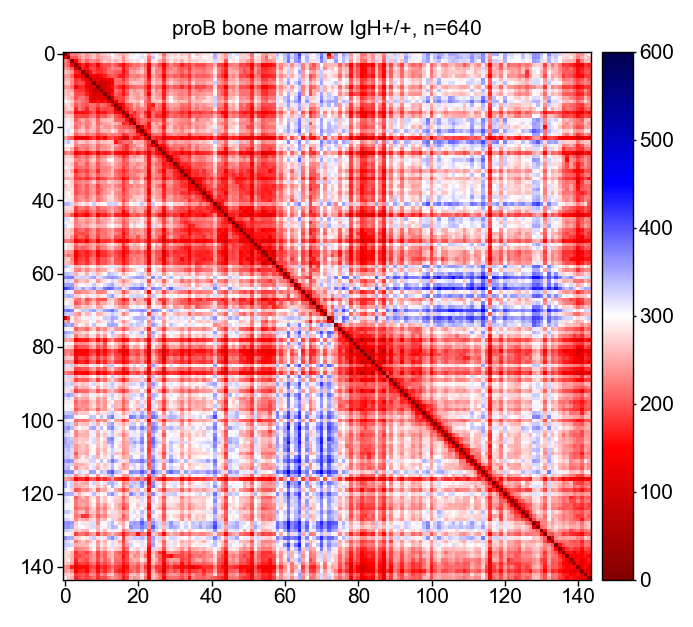

In [13]:
fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(median_distmap,
                                               #median_distmap[kept_inds][:,kept_inds], 
                                               color_limits=[0,600],
                                               ax=ax,
                                               ticks=np.arange(0,150,20), 
                                               figure_dpi=200)
ax.set_title(f"proB bone marrow IgH+/+, n={len(distmap_list)}", fontsize=7.5)
plt.show()

###### 

In [89]:
kept_ids = []
kept_inds = []
for _fd, _infos in fov.color_dic.items():
    if int(_fd.split('R')[-1]) > 48:
        break
    for _info in _infos:
        if _info[0] == 'u':
            _id = int(_info[1:])
            kept_ids.append(_id)
            kept_inds.append(list(fov.unique_ids).index(_id))
kept_inds = np.array(kept_inds, dtype=np.int)
print(kept_inds)
kept_inds = np.sort(kept_inds)
#print(kept_inds)

[  0   1   3   4   6   7   9  10  12  13  15  16  18  19  21  22  24  25
  27  28  30  31  33  34  36  37  39  40  42  43  45  46  48  49  51  52
  54  55  57  58  60  61  63  64  66  67  69  70  72  73  75  74  78  76
  81  79  84  82  87  85  89  88  92  90  95  93  98  96 101  99 104 102
 107 105 110 108 113 111 116 114 119 117 122 120 125 123 128 126 131 129
 136 132 139 134 142 137]


In [91]:
kept_ids = []
kept_inds = []
for _fd, _infos in fov.color_dic.items():
    if int(_fd.split('R')[-1]) <= 48:
        continue
    for _info in _infos:
        if _info[0] == 'u':
            _id = int(_info[1:])
            kept_ids.append(_id)
            kept_inds.append(list(fov.unique_ids).index(_id))
kept_inds = np.array(kept_inds, dtype=np.int)
print(kept_inds)
#kept_inds = np.sort(kept_inds)

[  2 140   8 143  14   5  20  11  26  17  32  23  38  29  44  35  50  41
  56  47  62  53  68  59  77  65  83  71  91  80  97  86 103  94 109 100
 115 106 121 112 127 118 133 124 138 130 141 135]


<IPython.core.display.Javascript object>


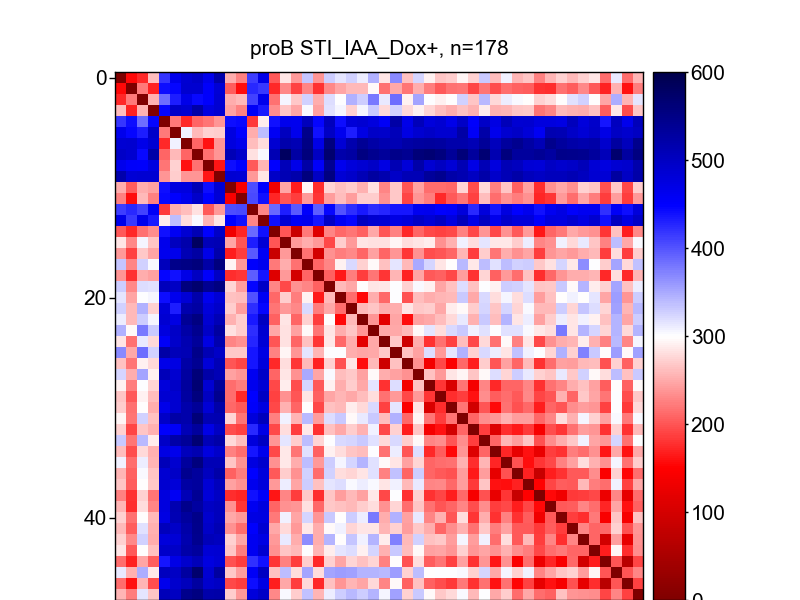

In [92]:
fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(#median_distmap,
                                               median_distmap[kept_inds][:,kept_inds], 
                                               color_limits=[0,600],
                                               ax=ax,
                                               #ticks=np.arange(0,150,50), 
                                               figure_dpi=200)
ax.set_title(f"proB STI_IAA_Dox+, n={len(distmap_list)}", fontsize=7.5)
plt.show()

In [125]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    _ind = list(_grp['ids'][:]).index(41)
    _im = _grp['ims'][_ind]
    sel_drifts = _grp['drifts'][:,:]
    sel_flags = _grp['flags'][:]
    sel_ids = _grp['ids'][:]
    sel_spots = _grp['spots'][:,:,:]
    print(_ind, np.sum(_grp['spots'][1]))

0 3826469.0


In [58]:
fov.unique_spots_list[100]

array([[ 6.56082726e+00,  2.59606991e+01,  6.11601379e+02, ...,
         7.73071229e-01, -3.07731796e-02,  1.70267914e+02],
       [ 4.22157383e+00,  2.32151070e+01,  9.43703918e+02, ...,
         4.81479615e-01,  6.38460398e-01,  1.23589035e+02],
       [ 3.96723986e+00,  2.77801933e+01,  7.93457642e+02, ...,
         7.53727496e-01,  9.04093564e-01,  1.02488930e+02],
       ...,
       [ 1.36868820e-01,  2.36938343e+01,  5.36140991e+02, ...,
         1.00000000e+00,  1.00000000e+00,  3.58169556e+01],
       [ 1.75873071e-01,  1.39472771e+01,  1.97251758e+03, ...,
        -2.08728582e-01, -6.80764616e-02,  3.75798035e+01],
       [ 1.79312319e-01,  2.28999996e+01,  8.71613098e+02, ...,
        -1.00000000e+00, -1.00000000e+00,  3.54034157e+01]], dtype=float32)

<IPython.core.display.Javascript object>


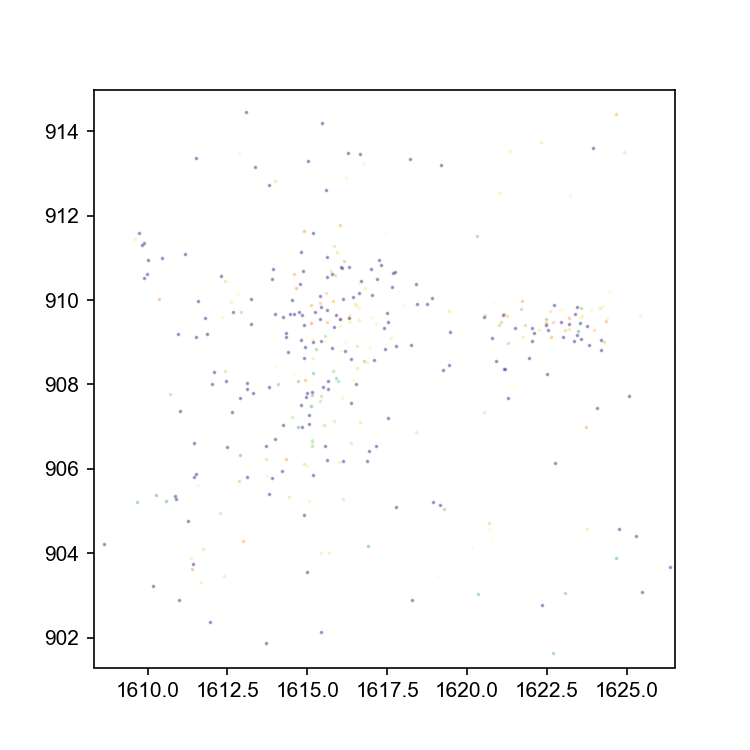

In [145]:
%matplotlib notebook
from matplotlib.cm import Spectral
plt.figure(figsize=(5,5),dpi=150)
for _id,_s in zip(sel_ids, kept_spots_list):
    plt.plot(_s[:,2],_s[:,3], '.', label=f'{_id}', 
             markersize=1.5, color=Spectral(_id/len(sel_ids)), alpha=0.5)
#plt.legend()
plt.ylim([0,2048])
plt.xlim([0,2048])
#plt.legend()
plt.show()

array([[0.98592849, 0.63737024, 0.35963091, 1.        ],
       [0.98869666, 0.65736255, 0.36885813, 1.        ],
       [0.99146482, 0.67735486, 0.37808535, 1.        ],
       [0.99238754, 0.69388697, 0.39008074, 1.        ],
       [0.99269512, 0.70926567, 0.40299885, 1.        ],
       [0.9928489 , 0.71695502, 0.4094579 , 1.        ],
       [0.99315648, 0.73233372, 0.42237601, 1.        ],
       [0.99346405, 0.74771242, 0.43529412, 1.        ],
       [0.99377163, 0.76309112, 0.44821223, 1.        ],
       [0.99392541, 0.77078047, 0.45467128, 1.        ],
       [0.99423299, 0.78615917, 0.46758939, 1.        ],
       [0.99454056, 0.80153787, 0.4805075 , 1.        ],
       [0.99484814, 0.81691657, 0.49342561, 1.        ],
       [0.99515571, 0.83229527, 0.50634371, 1.        ],
       [0.9953095 , 0.83998462, 0.51280277, 1.        ],
       [0.99561707, 0.85536332, 0.52572088, 1.        ],
       [0.99592464, 0.87074202, 0.53863899, 1.        ],
       [0.99638601, 0.88796617,

## visualize pciked hzxys

<IPython.core.display.Javascript object>


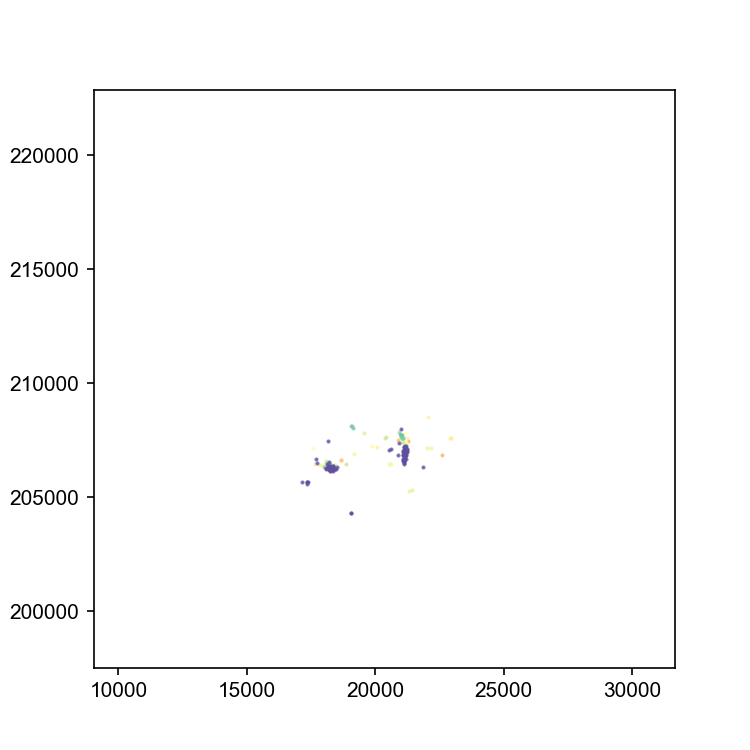

In [146]:
%matplotlib notebook
from matplotlib.cm import Spectral
plt.figure(figsize=(5,5),dpi=150)

for _i, _id in enumerate(sel_ids):
    plt.plot([_spots[_i,2] for _spots in final_dna_hzxys_list],
             [_spots[_i,3] for _spots in final_dna_hzxys_list],
             '.', markersize=2, color=Spectral(_id/(len(sel_ids)+1)), alpha=0.7)
#for _id,_s in zip(sel_ids, kept_spots_list):
#    plt.plot(_s[:,2],_s[:,3], '.', label=f'{_id}', 
#             markersize=1.5, color=Spectral(_id/len(sel_ids)), alpha=0.5)
#plt.legend()
#plt.ylim([0,2048])
#plt.xlim([0,2048])
#plt.legend()
plt.show()

## visualize fitted spots

<IPython.core.display.Javascript object>


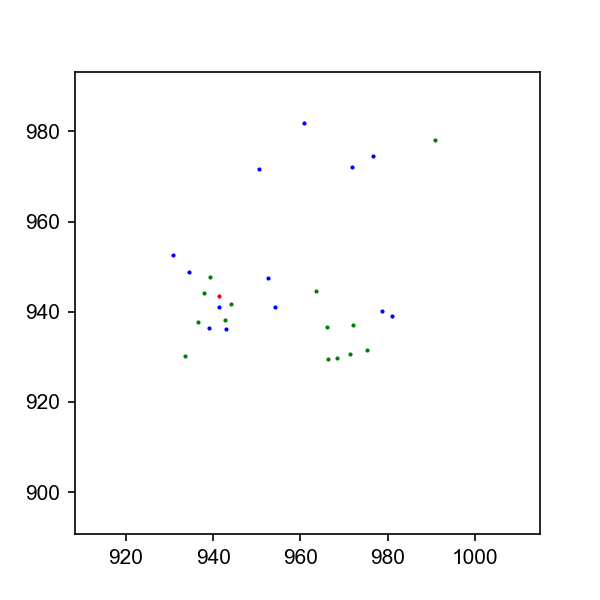

In [28]:
plt.figure(figsize=(4,4),dpi=150)
plt.plot(fov.chrom_coords[:,1], fov.chrom_coords[:,2], 'r.', markersize=2)
plt.plot(fov.unique_spots_list[0][:,2], fov.unique_spots_list[0][:,3], 'b.', markersize=2)
plt.plot(fov.unique_spots_list[-1][:,2], fov.unique_spots_list[-1][:,3], 'g.', markersize=2)

In [84]:
sel_drifts[kept_inds]

array([[ 2.670e+00,  6.750e+00, -2.800e-01],
       [ 2.670e+00,  6.750e+00, -2.800e-01],
       [ 2.660e+00,  3.018e+01,  0.000e+00],
       [ 2.660e+00,  3.018e+01,  0.000e+00],
       [ 2.580e+00,  3.860e+00,  2.620e+00],
       [ 2.580e+00,  3.860e+00,  2.620e+00],
       [ 2.570e+00, -4.690e+00,  2.610e+00],
       [ 2.570e+00, -4.690e+00,  2.610e+00],
       [ 2.540e+00,  5.300e-01,  2.060e+00],
       [ 2.540e+00,  5.300e-01,  2.060e+00],
       [ 2.600e+00,  2.336e+01,  4.000e-02],
       [ 2.600e+00,  2.336e+01,  4.000e-02],
       [ 2.570e+00,  2.933e+01,  1.000e-02],
       [ 2.570e+00,  2.933e+01,  1.000e-02],
       [ 2.560e+00,  2.841e+01, -1.500e-01],
       [ 2.560e+00,  2.841e+01, -1.500e-01],
       [ 2.510e+00,  2.522e+01, -1.100e-01],
       [ 2.510e+00,  2.522e+01, -1.100e-01],
       [ 2.560e+00,  2.280e+01, -2.500e-01],
       [ 2.560e+00,  2.280e+01, -2.500e-01],
       [ 2.560e+00,  2.134e+01, -2.200e-01],
       [ 2.560e+00,  2.134e+01, -2.200e-01],
       [ 2

In [86]:
sel_drifts[kept_inds]

array([[  0.46, -16.34,  16.85],
       [  0.46, -16.34,  16.85],
       [  0.44,  -8.16,  14.05],
       [  0.44,  -8.16,  14.05],
       [  2.29,  -2.57,  15.59],
       [  2.29,  -2.57,  15.59],
       [  2.35,   8.53,  14.83],
       [  2.35,   8.53,  14.83],
       [  2.31,   6.76,  13.09],
       [  2.31,   6.76,  13.09],
       [  0.44, -15.23,  17.16],
       [  0.44, -15.23,  17.16],
       [  2.33, -16.8 ,  17.91],
       [  2.33, -16.8 ,  17.91],
       [  0.46, -16.95,  17.39],
       [  0.46, -16.95,  17.39],
       [  0.44, -18.39,  20.26],
       [  0.44, -18.39,  20.26],
       [  0.42, -18.18,  18.52],
       [  0.42, -18.18,  18.52],
       [  0.41, -18.32,  17.25],
       [  0.41, -18.32,  17.25],
       [  0.41, -17.91,  18.16],
       [  0.41, -17.91,  18.16],
       [  0.41, -18.92,  17.75],
       [  0.41, -18.92,  17.75],
       [  0.41, -18.62,  16.99],
       [  0.41, -18.62,  16.99],
       [  0.42, -18.41,  17.88],
       [  0.42, -18.41,  17.88],
       [  

In [93]:
fov.fov_id

5

In [118]:
pickle.load(open(fov.drift_filename, 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: '\\\\10.245.74.158\\Chromatin_NAS_6\\20201002-B_dox-IAA-STI+_CTP-08_IgH\\Analysis\\drift\\Conv_zscan_05_current_cor.pkl'

In [101]:
bead_im, _ = io_tools.load.correct_fov_image(os.path.join(fov.data_folder[0], 'H29R29\\Conv_zscan_05.dax'), 
                                             [fov.channels[fov.bead_channel_index]],
                                             correction_folder=fov.correction_folder,
                                             single_im_size=fov.shared_parameters['single_im_size'],
                                             all_channels=fov.channels,
                                             illumination_corr=True, 
                                             warp_image=False, calculate_drift=False, return_drift=False,
                                             verbose=True,
                                             )

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20201002-B_dox-IAA-STI+_CTP-08_IgH\H29R29\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_6\20201002-B_dox-IAA-STI+_CTP-08_IgH\H29R29\Conv_zscan_05.dax  in 8.028s
-- removing hot pixels for channels:['488'] in 7.301s
-- illumination correction for channels: 488, in 1.663s
-- generate translation function for chromatic correction for channels: [] and drift:[0. 0. 0.] in 0.001s
-- finish correction in 17.336s


In [109]:
correction_tools.alignment.cross_correlation_align_single_image(bead_im[0], fov.ref_im,
                                                                single_im_size=fov.shared_parameters['single_im_size'])

-- aligning image -> directly use image
-- directly use ref_image


array([-0.09, -9.87,  6.47])

<IPython.core.display.Javascript object>


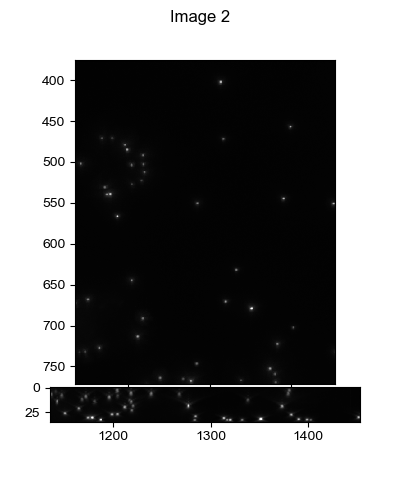

In [106]:
visual_tools.imshow_mark_3d_v2([bead_im[0], fov.ref_im])